<p style="font-family: Arial; font-size:3.5em;color:purple;"> XY Model </p>

In [86]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
from XY_diagonalisation import Computations_XY_model as XY_model
from ipywidgets import interact_manual,interact,FloatSlider
from IPython.display import clear_output
name=1
Data = np.load(f"Results/Fourier_{name}/Fourier.pkl",allow_pickle=True)

# Spectrum of the XY model

In [64]:
def Energy(Gamma,Lambda):
    XY_model.Gamma=Gamma
    XY_model.Lambda=Lambda
    plt.figure(figsize=(8,5))
    x=np.linspace(-np.pi,np.pi)
    plt.plot(x,XY_model.Omega(x),label=r"$\omega(\theta)$",color="forestgreen")
    plt.legend()
    plt.show()

interactive_plot = interactive(Energy, Gamma=FloatSlider(value=0.5,min=0, max=1, step=0.005,continuous_update=False), Lambda=FloatSlider(value=0.5,min=0, max=1, step=0.01,continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Gamma', max=1.0, step=0.005…

Our Hamiltonian can be written as
$$H=\begin{pmatrix}
\lambda & \frac{1-\gamma}{2} & 0 &0 &\ldots  &0 &\frac{1+\gamma}{2}\\
\frac{1+\gamma}{2} & \lambda & \frac{1-\gamma}{2} & 0 &\ldots &0 &0\\
0 & \frac{1+\gamma}{2} & \lambda & \frac{1-\gamma}{2} &\ldots &0 &0\\
\vdots& \ddots & \ddots & \ddots & \ldots &  \vdots & \vdots\\
\frac{1-\gamma}{2}&0&0&0&\ldots & \frac{1+\gamma}{2} & \lambda
\end{pmatrix},$$

In [65]:
XY_model.Gamma=0.5
XY_model.Lambda=0.5

In [66]:
XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=50)

array([[ 4.84836492e-01,  2.46937263e-01,  1.46007975e-03, ...,
         4.60704061e-03,  4.81947553e-05, -2.22647435e-04],
       [ 7.42279957e-01,  4.86536394e-01,  2.49255386e-01, ...,
         8.06543374e-03,  1.75470889e-03,  1.82876975e-03],
       [-4.55877278e-03,  7.43300909e-01,  4.97070683e-01, ...,
        -4.62572383e-03,  9.79347435e-03, -1.79494788e-03],
       ...,
       [ 1.68205416e-03,  4.01463309e-03, -5.25544283e-04, ...,
         4.90542509e-01,  2.52051330e-01,  5.59558179e-03],
       [ 8.69735435e-03, -1.16084841e-03,  5.74316611e-03, ...,
         7.46092744e-01,  4.90697884e-01,  2.44843862e-01],
       [-3.68041294e-03,  1.04787479e-02, -4.80627577e-03, ...,
        -3.80092639e-04,  7.40134333e-01,  4.78758976e-01]])

In [67]:
L=50
H=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i==j:
            H[i,j] = XY_model.Lambda
        elif (i-j) % L == 1:
            H[i,j] = (1+XY_model.Gamma)*0.5
        elif (j-i) % L == 1:
            H[i,j] = (1-XY_model.Gamma)*0.5
H[0,L-1]=0
H[L-1,0]=0

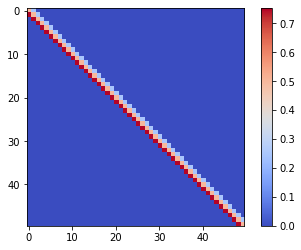

In [76]:
plt.imshow(H,cmap="coolwarm")
plt.colorbar()

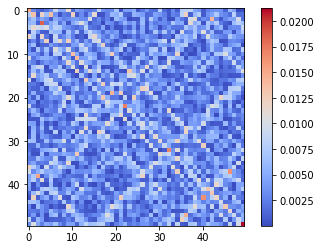

In [77]:
number=0
plt.imshow(np.abs(H-XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)),cmap="coolwarm")
plt.colorbar()

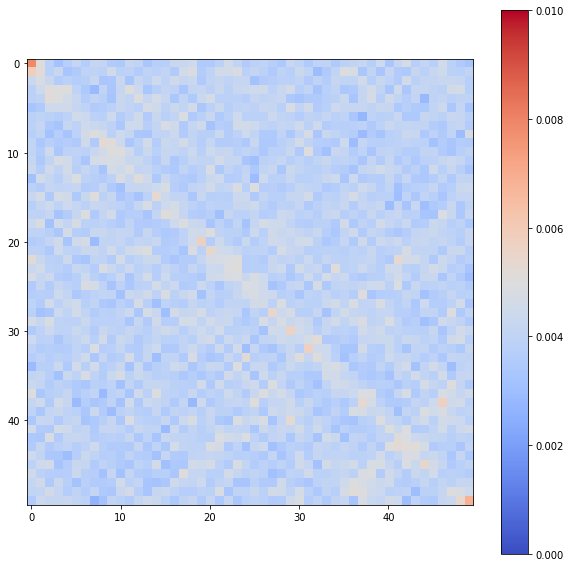

In [79]:
diff=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(10,10))
    diff+=np.abs(H-XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L))/L
    img=plt.imshow(diff,cmap="coolwarm")
    img.set_clim(0,0.01)
    plt.colorbar()
    plt.show()
    clear_output(wait=True)
    

# Typicallity

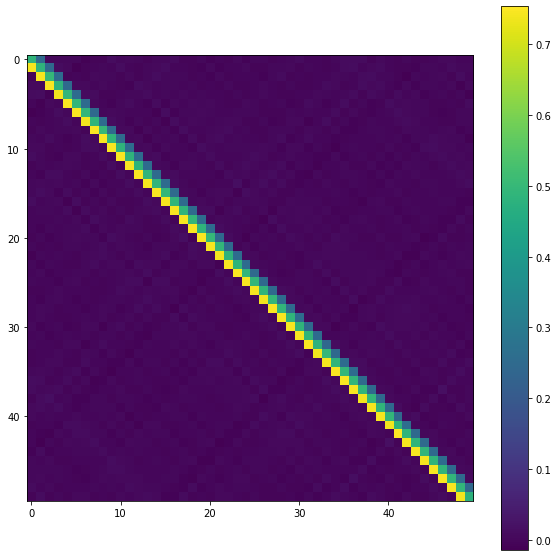

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=L))
plt.colorbar()

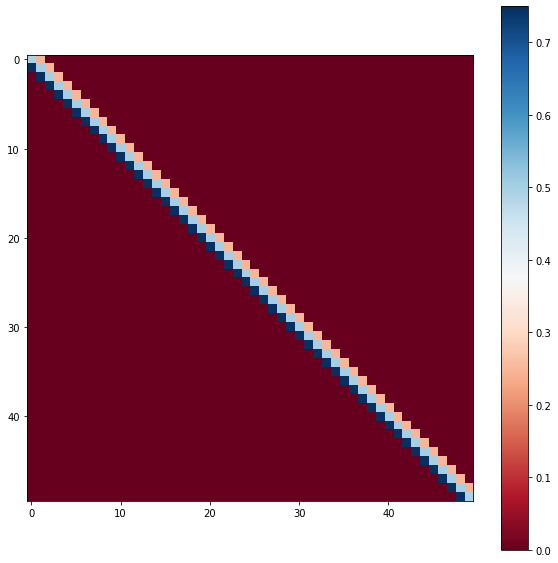

In [100]:
avg=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(10,10))
    avg+=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)
    img=plt.imshow(avg/(number+1),cmap="RdBu")
    plt.colorbar()
    #img=plt.imshow(avg,norm=colors.SymLogNorm(linthresh=0.01, linscale=0.1, vmin=-0.01, vmax=0.77),cmap="RdBu")
    #cosa=plt.colorbar(img,extend='max',shrink=0.8)
    img.set_clim(0,0.75)
    
    plt.show()
    clear_output(wait=True)

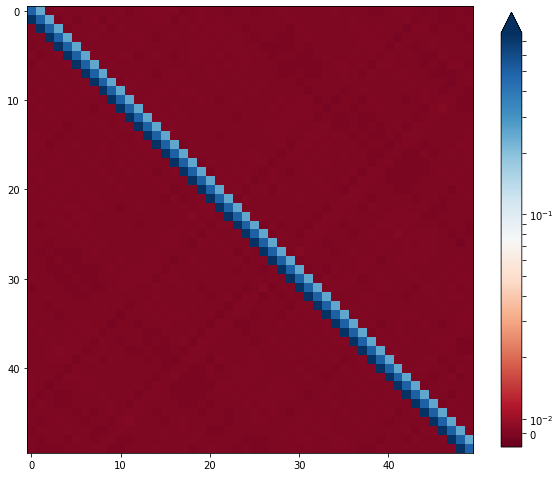

In [106]:
avg=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(10,10))
    avg+=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)
    #img=plt.imshow(avg,cmap="RdBu")
    #plt.colorbar()
    img=plt.imshow(avg/(number+1),norm=colors.SymLogNorm(linthresh=0.01, linscale=0.1, vmin=-0.01, vmax=0.77),cmap="RdBu")
    cosa=plt.colorbar(img,extend='max',shrink=0.8)
    #img.set_clim(0,0.8)
    
    plt.show()
    clear_output(wait=True)

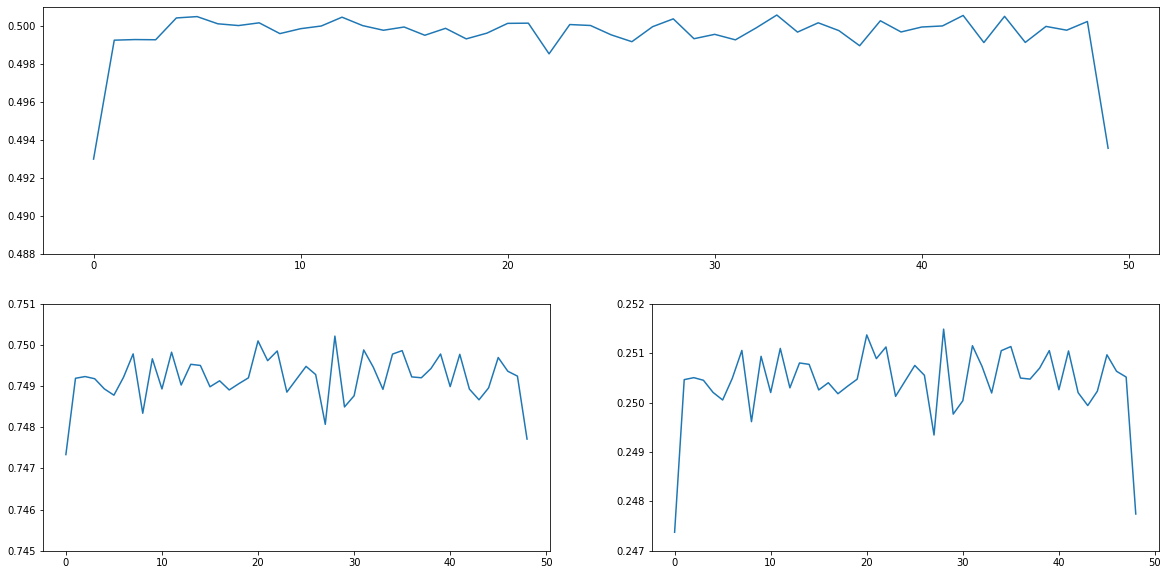

In [105]:
avg=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(20,10))
    avg+=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)
    plt.subplot(2,1,1)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),0))
    plt.ylim(0.488,0.501)
    plt.subplot(2,2,3)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),1))
    plt.ylim(0.745,0.751)
    plt.subplot(2, 2, 4)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),-1))
    plt.ylim(0.247,0.252)
    plt.show()
    clear_output(wait=True)

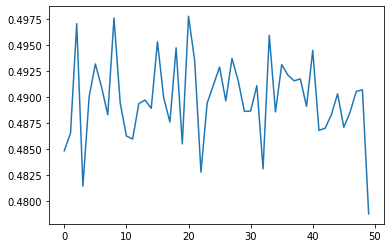

In [35]:
plt.plot(XY_model.get_band_of_matrix(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=50),0))

# References
* [Ground state entanglement in quantum spin chains, Latorre et. al.](https://arxiv.org/pdf/quant-ph/0304098.pdf)

* [Calculation of reduced density matrices from correlation functions, Ingo Peschel](https://arxiv.org/pdf/cond-mat/0212631.pdf)

* [Pairing in fermionic systems: A quantum information perspective, Christina V. Kraus et. al.](https://arxiv.org/pdf/0810.4772.pdf)

* [On the Strong Subadditivity of the Renyi entropies for bosonic and fermionic Gaussian states, Giancarlo Camilo et. al.](https://arxiv.org/pdf/1810.07070.pdf)

* [ON CIRCULANT MATRICES, IRWIN KRA AND SANTIAGO R. SIMANCA](https://www.math.columbia.edu/~ums/pdf/cir-not5.pdf)